In [55]:
#NBC Classifer
#Name : Shivani Shridhar Gole
#NUID : 002770631

In [20]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
pip install app-store-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
#Installing necessary libraries
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json, os, uuid

In [23]:
#Scraping Data from google and apple store reviews
g_reviews = reviews_all(
        "com.fitbod.fitbod",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )
a_reviews = AppStore('us', 'fitbod-workout-fitness-plans', '1041517543')
a_reviews.review()

ERROR:Base:Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/us/apps/1041517543/reviews?l=en-GB&offset=3340&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))


In [24]:
#Data Scraping from Google Play
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'

In [25]:
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,5105331e-b40e-4a77-996c-4525be31707a,storitimes,None,it was going good at first but now when I pres...,1,0,2023-04-11 22:58:27,"Hi there, we're so sorry to hear we weren't a ...",2023-04-12 17:49:31,en,us
1,Google Play,183408b0-2a89-438d-8b36-92cdf289d77e,Toni “Batgirl” Gonder,None,"So far, I'm giving this 3 stars. If it works w...",3,0,2023-04-11 20:20:10,Thank you for taking the time to share this wi...,2023-04-12 17:46:41,en,us
2,Google Play,8b02dd8b-489d-4ac4-acdb-9f442f1e7fdb,Ayla A,None,It's good,5,0,2023-04-11 15:37:43,"Thank you for your rating, Ayla!",2023-04-12 17:44:49,en,us
3,Google Play,a2c73ae7-c737-48b0-9468-56c9e4fae86a,Shinya,None,Been using it for a bit and just went to the f...,4,0,2023-04-11 10:31:43,"Thank you for your 5-star rating, Shinya!",2023-03-09 16:26:51,en,us
4,Google Play,0aae13ea-cced-4e98-a87a-d1acd39e4a6b,Swapnil Devikar,None,This app has the promise of making things intu...,2,0,2023-04-11 02:31:31,"Hi Swapnil, we're very sorry you've experience...",2023-04-11 15:30:22,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
3056,Google Play,28779942-44c0-4924-854d-89a4b168404b,Ivan Main,None,CS contacted me advising that my subscription ...,1,3,2020-06-09 12:12:29,"Hi Ivan, sorry about the issue you have been e...",2020-06-09 16:52:38,en,us
3057,Google Play,1b9c3d5e-cfb8-40a9-bdd0-408036ab68b6,Nathan Weston,None,"Great app, would happily have paid for this",5,1,2020-06-09 08:03:25,None,NaT,en,us
3058,Google Play,27058e2f-914c-4f26-97c1-afc74be27d36,Patrick Ingmire,None,Glad it's finally on Android!,5,2,2020-06-08 16:25:46,None,NaT,en,us
3059,Google Play,57831c04-51d0-4555-89d7-c95f3767ae53,George Webberley,None,The best workout app I have ever tried. It hel...,5,5,2020-06-07 09:14:16,None,NaT,en,us


In [26]:
#Data Scraping from App Store
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'us'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)

In [27]:
a_df2

,source,review_id,review_date,developer_response,review_description,rating,review_title,user_name,developer_response_date,thumbs_up,laguage_code,country_code
0,App Store,16b4a1e5-d2b3-499e-9932-dac182a0c7b0,2022-07-15 18:44:15,"{'id': 30979296, 'body': 'Thank you for your 5...",I have been working out on and off since high ...,5,Great App for Consistency,Crooked Line,None,None,en,us
1,App Store,c041ffe8-494b-4c28-9bbb-d0845b3895af,2020-04-03 01:49:11,None,I’ve been using the app for 4 weeks now- at fi...,5,Took 2 weeks and now love it,KelGym,None,None,en,us
2,App Store,e6155c9e-98fa-4d7a-affd-421ac165c141,2019-02-28 13:17:09,None,I’ve used this app for one week which granted ...,5,Good but not great enough to pay for...yet,nbct.wright,None,None,en,us
3,App Store,487ad6bf-a3d8-483b-98f4-8552a5dd6ce8,2019-07-17 21:01:48,None,***9 month update: I ended up losing 40 more p...,5,I love whoever created this so much,rachelafile,None,None,en,us
4,App Store,3274bf69-d6c3-48ba-8d30-291fb09e6c6c,2020-08-06 23:38:29,None,I really like this app a lot. It has an intuit...,4,Revolutionary idea - still some more work to do,tylerc081691,None,None,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
3335,App Store,f6dd3a0a-75f4-4732-bb5d-230255a4aa24,2018-03-26 05:24:05,"{'id': 3018886, 'body': 'Synchronizing the Fit...",Incorporating a how to for performing exercise...,4,How to on Apple Watch and Group Workouts,$AINTSMOK,None,None,en,us
3336,App Store,ce46912b-5b17-4129-873b-473e8f8ebc93,2017-11-25 01:40:00,"{'id': 1845067, 'body': 'Thanks for the referr...",The app has been excellent with me but after I...,5,Good but could be better,Havok929,None,None,en,us
3337,App Store,f3c90147-6b98-4d9e-81a3-b072695694cc,2023-01-17 12:22:05,"{'id': 34365793, 'body': 'This is great to hea...","Great workouts the last two mornings, definite...",5,Excellent workout,cl0510,None,None,en,us
3338,App Store,789c2aa9-c35e-46bd-bb2b-7fa77a003706,2022-11-10 18:20:38,None,I’m a beginner and joining a gym a was pretty ...,5,Great App!,Jjsbdjxhd,None,None,en,us


In [28]:
result_df = pd.concat([g_df2,a_df2])
result_df

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,laguage_code,country_code
0,Google Play,5105331e-b40e-4a77-996c-4525be31707a,storitimes,None,it was going good at first but now when I pres...,1,0,2023-04-11 22:58:27,"Hi there, we're so sorry to hear we weren't a ...",2023-04-12 17:49:31,en,us
1,Google Play,183408b0-2a89-438d-8b36-92cdf289d77e,Toni “Batgirl” Gonder,None,"So far, I'm giving this 3 stars. If it works w...",3,0,2023-04-11 20:20:10,Thank you for taking the time to share this wi...,2023-04-12 17:46:41,en,us
2,Google Play,8b02dd8b-489d-4ac4-acdb-9f442f1e7fdb,Ayla A,None,It's good,5,0,2023-04-11 15:37:43,"Thank you for your rating, Ayla!",2023-04-12 17:44:49,en,us
3,Google Play,a2c73ae7-c737-48b0-9468-56c9e4fae86a,Shinya,None,Been using it for a bit and just went to the f...,4,0,2023-04-11 10:31:43,"Thank you for your 5-star rating, Shinya!",2023-03-09 16:26:51,en,us
4,Google Play,0aae13ea-cced-4e98-a87a-d1acd39e4a6b,Swapnil Devikar,None,This app has the promise of making things intu...,2,0,2023-04-11 02:31:31,"Hi Swapnil, we're very sorry you've experience...",2023-04-11 15:30:22,en,us
...,...,...,...,...,...,...,...,...,...,...,...,...
3335,App Store,f6dd3a0a-75f4-4732-bb5d-230255a4aa24,$AINTSMOK,How to on Apple Watch and Group Workouts,Incorporating a how to for performing exercise...,4,None,2018-03-26 05:24:05,"{'id': 3018886, 'body': 'Synchronizing the Fit...",NaT,en,us
3336,App Store,ce46912b-5b17-4129-873b-473e8f8ebc93,Havok929,Good but could be better,The app has been excellent with me but after I...,5,None,2017-11-25 01:40:00,"{'id': 1845067, 'body': 'Thanks for the referr...",NaT,en,us
3337,App Store,f3c90147-6b98-4d9e-81a3-b072695694cc,cl0510,Excellent workout,"Great workouts the last two mornings, definite...",5,None,2023-01-17 12:22:05,"{'id': 34365793, 'body': 'This is great to hea...",NaT,en,us
3338,App Store,789c2aa9-c35e-46bd-bb2b-7fa77a003706,Jjsbdjxhd,Great App!,I’m a beginner and joining a gym a was pretty ...,5,None,2022-11-10 18:20:38,None,NaT,en,us


In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk

In [30]:
#Dropping irrelevant data
data = result_df.drop(columns=['source', 'review_id', 'user_name', 'review_title', 'thumbs_up', 'review_date',
                          'developer_response', 'developer_response_date', 'laguage_code', 'country_code'])

In [31]:
data

,review_description,rating
0,it was going good at first but now when I pres...,1
1,"So far, I'm giving this 3 stars. If it works w...",3
2,It's good,5
3,Been using it for a bit and just went to the f...,4
4,This app has the promise of making things intu...,2
...,...,...
3335,Incorporating a how to for performing exercise...,4
3336,The app has been excellent with me but after I...,5
3337,"Great workouts the last two mornings, definite...",5
3338,I’m a beginner and joining a gym a was pretty ...,5


In [32]:
data.dropna(inplace=True)
data

,review_description,rating
0,it was going good at first but now when I pres...,1
1,"So far, I'm giving this 3 stars. If it works w...",3
2,It's good,5
3,Been using it for a bit and just went to the f...,4
4,This app has the promise of making things intu...,2
...,...,...
3335,Incorporating a how to for performing exercise...,4
3336,The app has been excellent with me but after I...,5
3337,"Great workouts the last two mornings, definite...",5
3338,I’m a beginner and joining a gym a was pretty ...,5


In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [35]:
#1,2,3->negative(i.e 0)
data.loc[data['rating']<=3,'rating'] = 0

#4,5->positive(i.e 1)
data.loc[data['rating']>3,'rating'] = 1

In [36]:
# Replace 0 with 'negative' and 1 with 'positive' in 'rating' column
data['rating'] = data['rating'].map({0: 'negative', 1: 'positive'})


In [37]:
data

,review_description,rating
0,it was going good at first but now when I pres...,negative
1,"So far, I'm giving this 3 stars. If it works w...",negative
2,It's good,positive
3,Been using it for a bit and just went to the f...,positive
4,This app has the promise of making things intu...,negative
...,...,...
3335,Incorporating a how to for performing exercise...,positive
3336,The app has been excellent with me but after I...,positive
3337,"Great workouts the last two mornings, definite...",positive
3338,I’m a beginner and joining a gym a was pretty ...,positive


In [38]:
stp_words = stopwords.words('english')

def clean_review(review):
    cleanreview = " ".join(word for word in review.split() if word not in stp_words)
    return cleanreview

data['review_description'] = data['review_description'].apply(clean_review)

In [39]:
#Tokenizing data
def preprocess_text(text):
    tokens = word_tokenize(text)
    
    tokens = [token.lower() for token in tokens if token.isalpha()]
    

    tokens = [token for token in tokens if token not in stop_words]
    
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    text = ' '.join(tokens)
    
    return text

In [42]:
data['rating'].value_counts()


positive    4609
negative    1792
Name: rating, dtype: int64

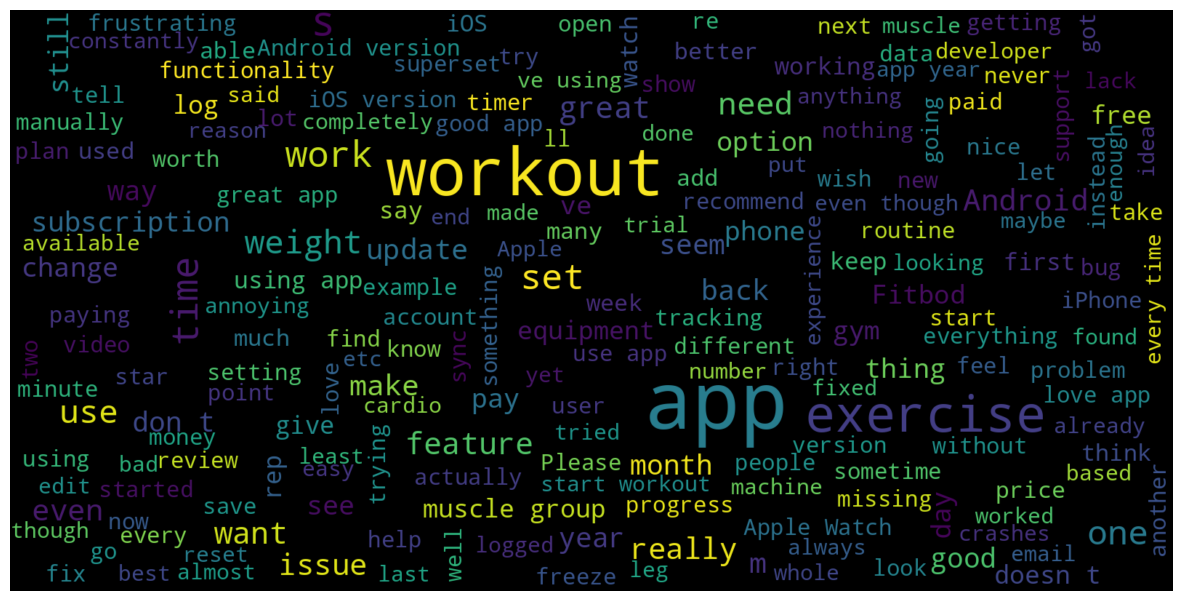

In [44]:
#Word count for negative
consolidated=' '.join(word for word in data['review_description'][data['rating']=='negative'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


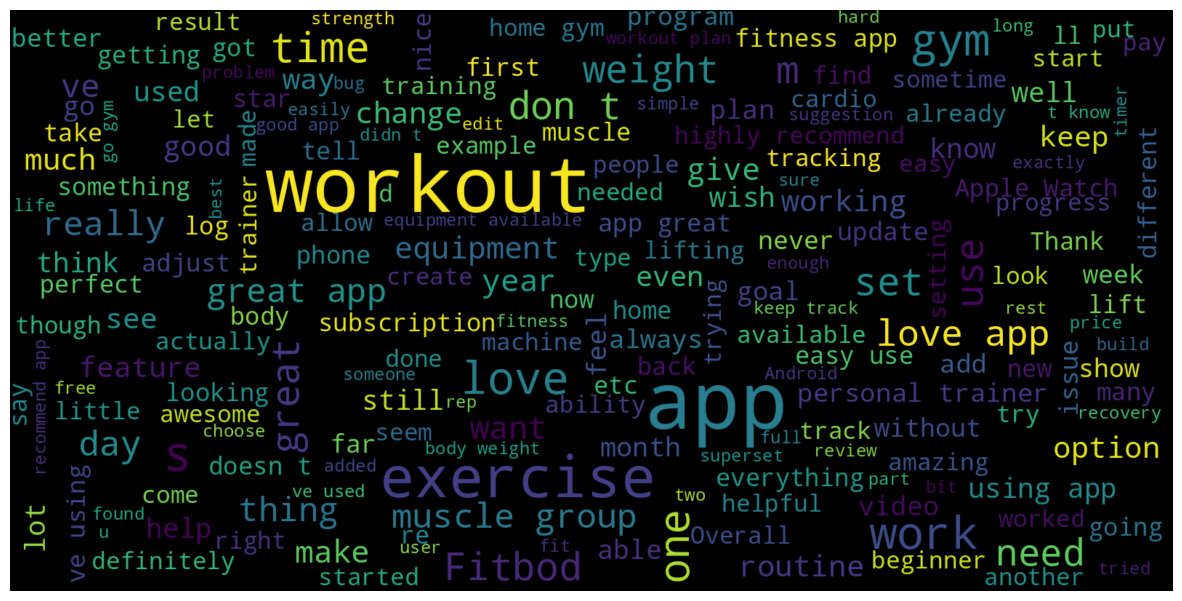

In [45]:
#Word count for positive
consolidated=' '.join(word for word in data['review_description'][data['rating']=='positive'].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


In [46]:
#Vectorizing
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review_description'] ).toarray()

In [47]:
#Data Split
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['rating'],
												test_size=0.2 ,
												random_state=42)


In [48]:
#Naive Bayes Classifer
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [49]:
y_pred = clf.predict(x_test)


In [50]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8071818891491023


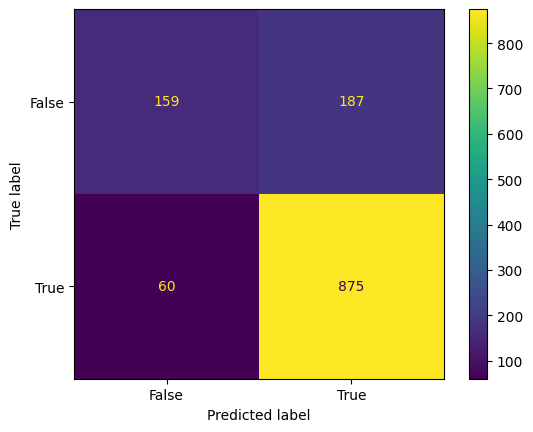

In [51]:
#Confusion matrix
from sklearn import metrics
cm = confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

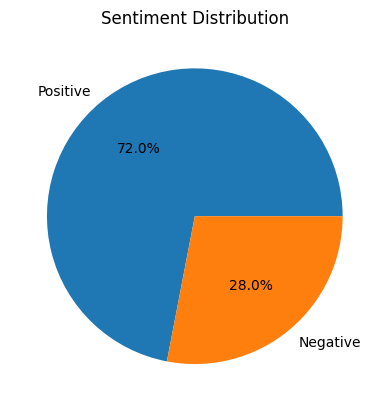

In [56]:
import matplotlib.pyplot as plt

# Example data
sentiment_labels = ['Positive', 'Negative']
sentiment_counts = [4602, 1792]

# Plotting pie chart
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()
